<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Parcial3_AnayJaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelación de sistemas Químicos
Departamento de Ingeniería Química y de Alimentos


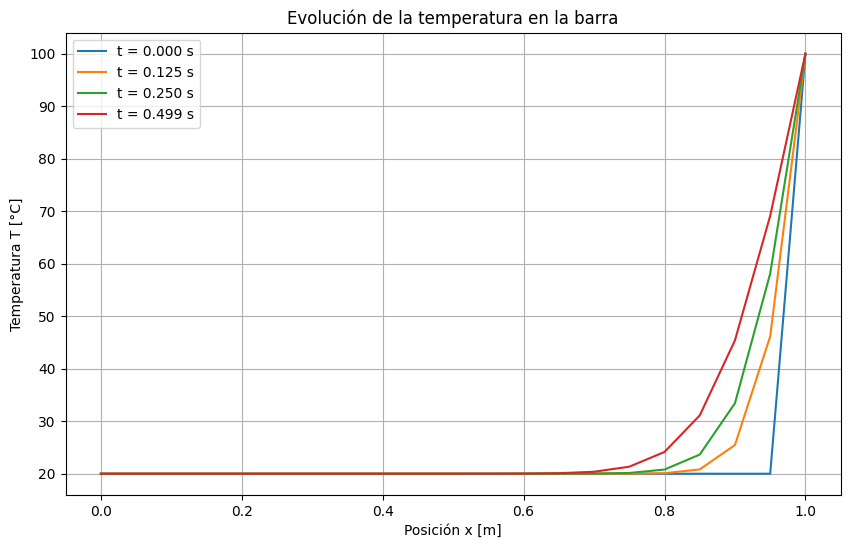

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0                # Longitud de la barra [m]
alpha = 0.01           # Difusividad térmica [m^2/s]
nx = 20                # Número de puntos espaciales
dx = L / nx            # Tamaño del paso espacial
dt = 0.001             # Paso temporal [s]
nt = 500               # Número de pasos de tiempo
x = np.linspace(0, L, nx+1)  # Puntos espaciales

# Condiciones iniciales y de frontera
T = np.ones(nx+1) * 20  # T(x, 0) = 20°C
T[0] = 20               # T(0, t) = 20°C
T[-1] = 100             # T(L, t) = 100°C

# Factor de estabilidad (para estabilidad explícita debe cumplirse Fo <= 0.5)
Fo = alpha * dt / dx**2
if Fo > 0.5:
    raise ValueError(f"El paso de tiempo es demasiado grande para la estabilidad (Fo = {Fo:.2f}).")

# Resolución con diferencias finitas explícitas
T_all = [T.copy()]  # Almacena todas las distribuciones de temperatura
for _ in range(nt):
    T_new = T.copy()
    for i in range(1, nx):
        T_new[i] = T[i] + Fo * (T[i-1] - 2*T[i] + T[i+1])  # Ecuación de diferencias finitas
    T = T_new
    T_all.append(T.copy())

# Conversión a array para fácil manejo
T_all = np.array(T_all)

# Graficar resultados para diferentes tiempos
plt.figure(figsize=(10, 6))
time_indices = [0, nt//4, nt//2, nt-1]  # Momentos seleccionados
for t_idx in time_indices:
    plt.plot(x, T_all[t_idx, :], label=f"t = {t_idx * dt:.3f} s")

plt.title("Evolución de la temperatura en la barra")
plt.xlabel("Posición x [m]")
plt.ylabel("Temperatura T [°C]")
plt.legend()
plt.grid()
plt.show()



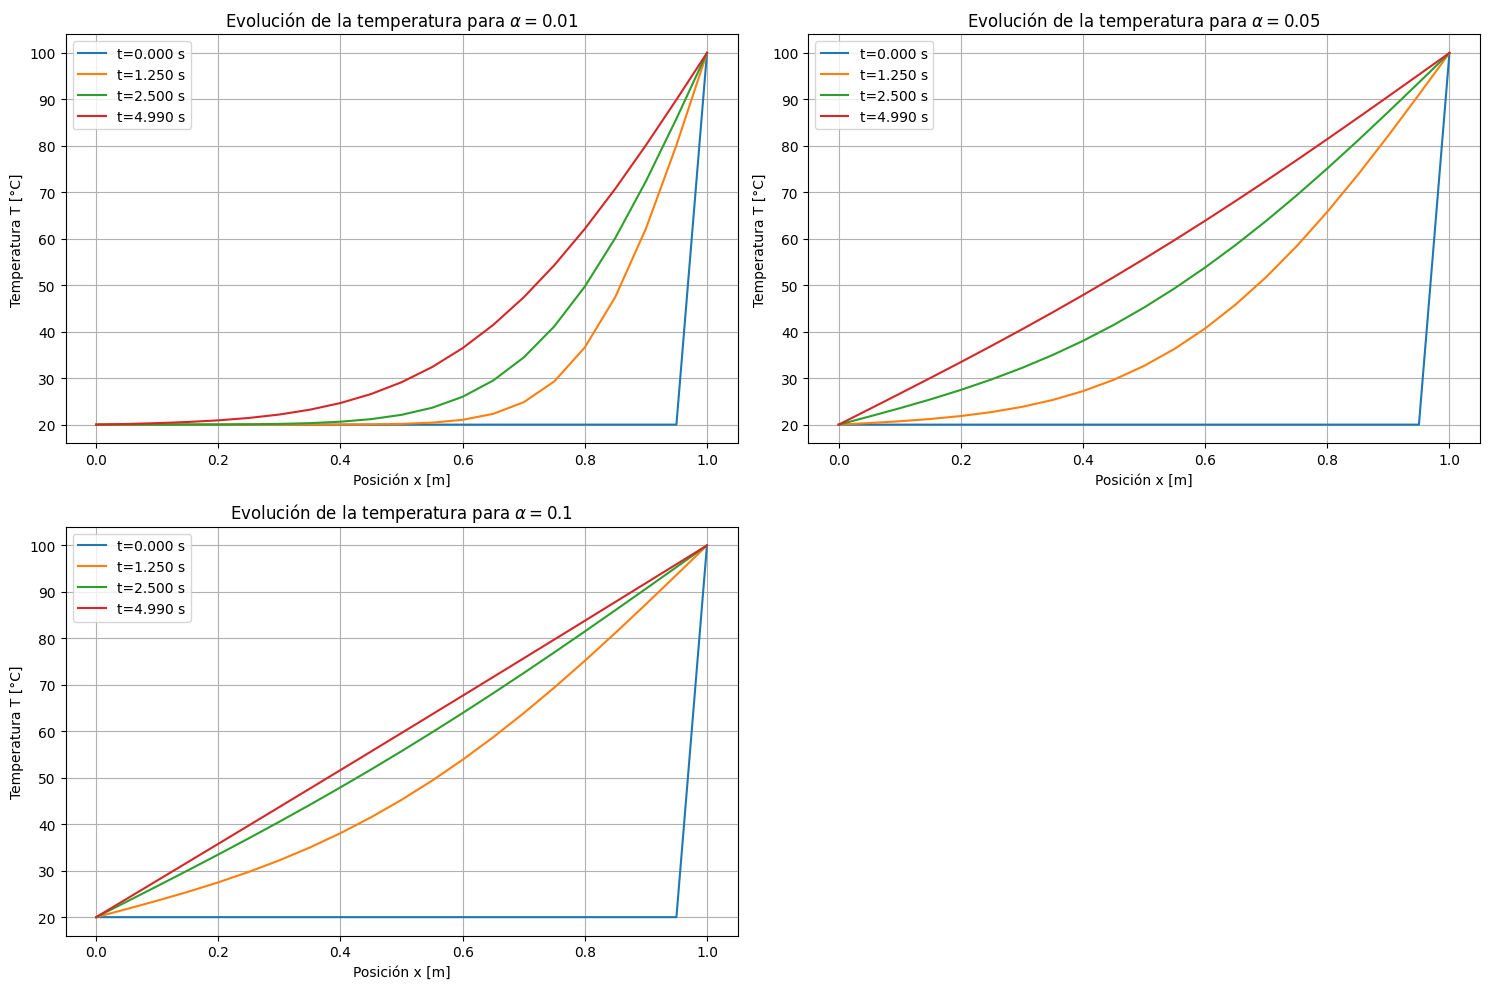

In [2]:
# Parámetros generales
L = 1.0                # Longitud de la barra [m]
nx = 20                # Número de puntos espaciales
dx = L / nx            # Tamaño del paso espacial
dt = 0.01             # Paso temporal [s]
nt = 500               # Número de pasos de tiempo
x = np.linspace(0, L, nx+1)  # Puntos espaciales
alphas = [0.01, 0.05, 0.1]   # Valores de difusividad térmica

# Función para resolver la ecuación de calor con un valor de alpha
def resolver_ecuacion(alpha):
    # Inicialización de temperatura
    T = np.ones(nx+1) * 20  # T(x, 0) = 20°C
    T[0] = 20               # T(0, t) = 20°C
    T[-1] = 100             # T(L, t) = 100°C

    # Factor de estabilidad
    Fo = alpha * dt / dx**2
    if Fo > 0.5:
        raise ValueError(f"El paso de tiempo es demasiado grande para la estabilidad (Fo = {Fo:.2f}).")

    # Resolución con diferencias finitas explícitas
    T_all = [T.copy()]  # Almacena todas las distribuciones de temperatura
    for _ in range(nt):
        T_new = T.copy()
        for i in range(1, nx):
            T_new[i] = T[i] + Fo * (T[i-1] - 2*T[i] + T[i+1])  # Ecuación de diferencias finitas
        T = T_new
        T_all.append(T.copy())

    return np.array(T_all)

# Resolver para cada valor de alpha
resultados = {}
for alpha in alphas:
    resultados[alpha] = resolver_ecuacion(alpha)

# Graficar resultados para diferentes valores de alpha en un mismo gráfico
# Graficar resultados para cada valor de alpha en gráficos separados
plt.figure(figsize=(15, 10))
for idx, (alpha, T_all) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, idx)  # Organiza las gráficas en una cuadrícula
    for t_idx in time_indices:
        plt.plot(x, T_all[t_idx, :], label=f"t={t_idx*dt:.3f} s")
    plt.title(f"Evolución de la temperatura para $\\alpha={alpha}$")
    plt.xlabel("Posición x [m]")
    plt.ylabel("Temperatura T [°C]")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


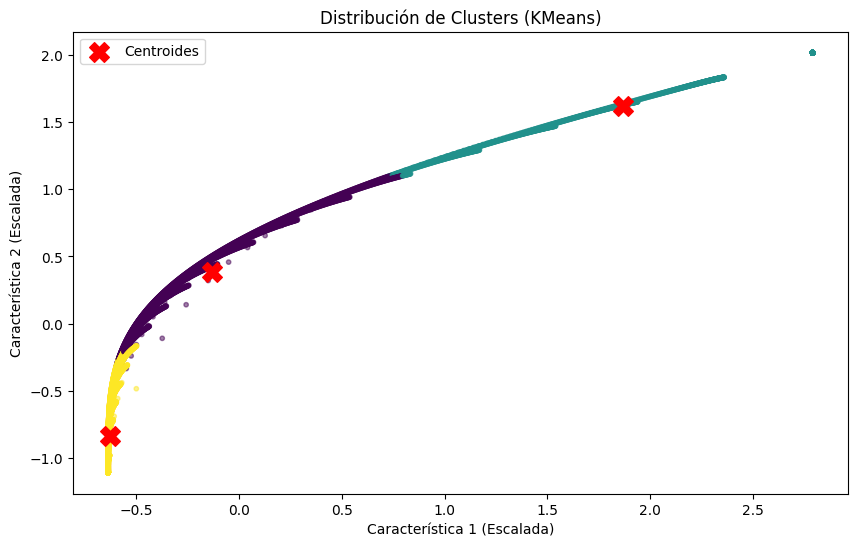

Cantidad de elementos por cluster:
Cluster
2    5340
0    3182
1    1999
Name: count, dtype: int64


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data_matrix = np.vstack([res.flatten() for res in resultados.values()]).T
dataset = pd.DataFrame(data_matrix, columns=[f'alpha={alpha}' for alpha in alphas])

# Preparación de los datos (normalización)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

# Aplicación de KMeans
n_clusters = 3  # Número de clusters (puedes ajustar este valor)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualización de los centroides
centroids = kmeans.cluster_centers_

# Gráfico de distribución de clusters (usando las dos primeras características)
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dataset['Cluster'], cmap='viridis', s=10, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title('Distribución de Clusters (KMeans)')
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.legend()
plt.show()

# Visualización de cantidad de elementos por cluster
cluster_counts = dataset['Cluster'].value_counts()
print("Cantidad de elementos por cluster:")
print(cluster_counts)